### Data Loading

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('salaries.csv')
df.head()

,Years of Experience,Education Level,Age,Location Factor,Salary
0,29,1,49,7,124204
1,27,3,45,4,125948
2,20,4,41,8,116078
3,14,4,37,5,106486
4,20,3,42,7,113297


In [23]:
df.shape

(1000, 5)

### Train Model with All Features

In [24]:
X = df.drop('Salary', axis='columns')
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

full_model = LinearRegression()
full_model.fit(X_train, y_train)
full_model.score(X_test, y_test)

0.9525773624816919

In [25]:
full_model.intercept_

np.float64(52608.487605282404)

In [26]:
full_model.coef_

array([2113.98280589, 5007.82035443, -123.21488799, 1487.64526717])

In [27]:
X_test[:1]

,Years of Experience,Education Level,Age,Location Factor
841,38,1,56,9


In [28]:
full_model.predict(X_test[:1])

array([144436.42826039])

In [29]:
38 * full_model.coef_[0] + 1 * full_model.coef_[1] + 56 * full_model.coef_[2] + 9 * full_model.coef_[3] + full_model.intercept_

np.float64(144436.42826039356)

<Axes: xlabel='Age', ylabel='Salary'>

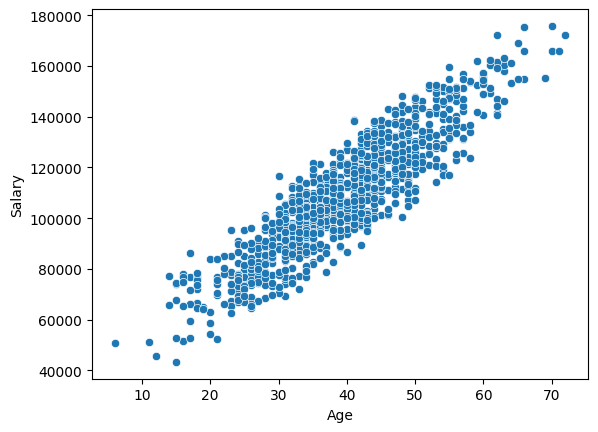

In [30]:
sns.scatterplot(df, x="Age", y="Salary")

### Multicollinearity using VIF

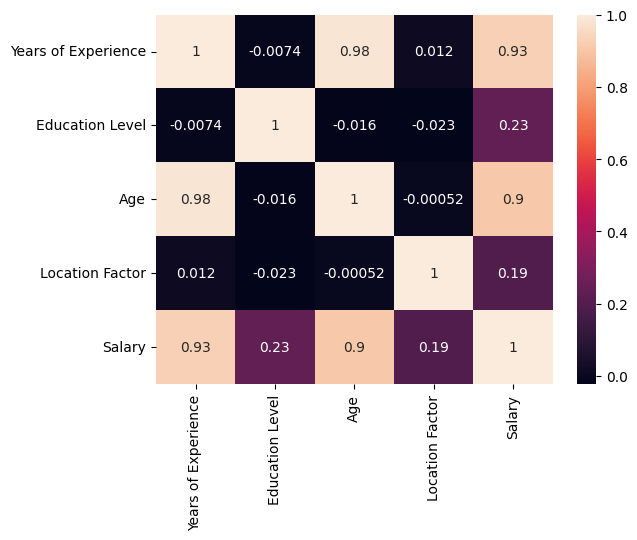

In [40]:
cm = df.corr()
sns.heatmap(cm, annot=True)
plt.show()

### Compute Variance Inflation Factor (VIF)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Variable'] =  data.columns
    vif_df["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [34]:
X = df.drop('Salary', axis='columns')
calculate_vif(X)

,Variable,VIF
0,Years of Experience,22.342087
1,Education Level,5.472969
2,Age,42.201149
3,Location Factor,4.289467


In [35]:
calculate_vif(X.drop(["Age"], axis='columns'))

,Variable,VIF
0,Years of Experience,3.198601
1,Education Level,3.509425
2,Location Factor,3.231181


### Train Model with Filtered Features using VIF

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X.drop("Age", axis="columns"), y, test_size=0.2, random_state=10)

model_reduced=LinearRegression()
model_reduced.fit(X_train, y_train)
model_reduced.score(X_test, y_test)

0.9523792255284542

In [37]:
model_reduced.coef_

array([1995.01818661, 5019.90803026, 1495.54971534])

In [39]:
X_test[:1]

,Years of Experience,Education Level,Location Factor
841,38,1,9
